In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import random

In [4]:
# Load and preprocess the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data() # Load data using cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize data

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [6]:
# CIFAR-100 class names
CIFAR100_LABELS = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

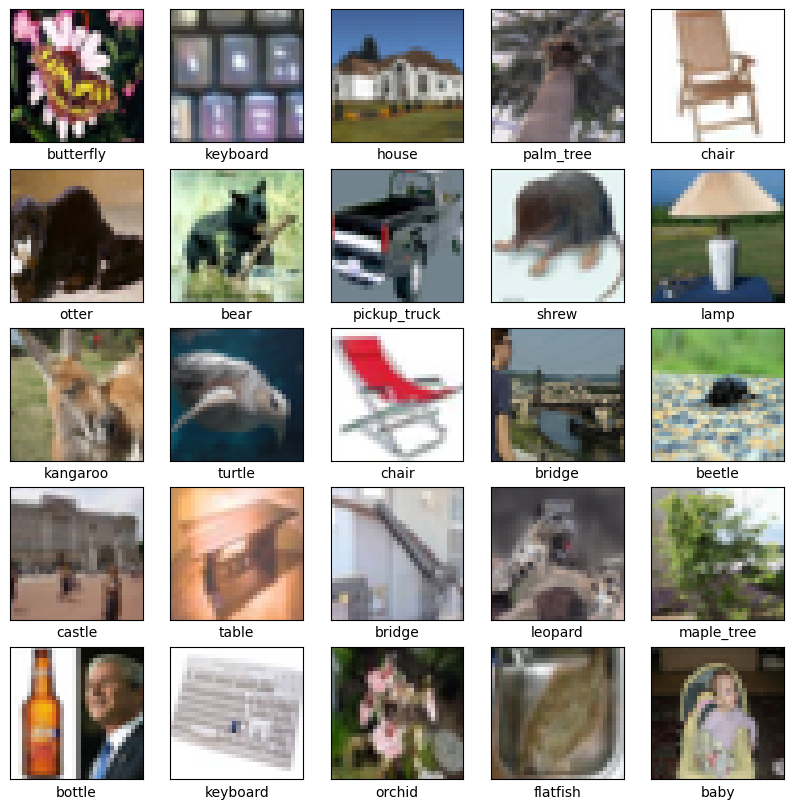

In [7]:
# Visualize 25 random images in a 5x5 grid
plt.figure(figsize=(10, 10))
for i in range(25):
    index = random.randint(0, len(x_train) - 1)  # Random index
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], interpolation='nearest')
    # Get the class index from the one-hot encoded label using np.argmax
    plt.xlabel(CIFAR100_LABELS[np.argmax(y_train[index])])
plt.show()

In [13]:
# Build the CNN Model
model = models.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 3
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the Output
        layers.Flatten(),

        # Fully Connected Layer
        layers.Dense(256, activation='relu'),

        # Output Layer
        layers.Dense(100, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0574 - loss: 4.1889 - val_accuracy: 0.1784 - val_loss: 3.4312
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2032 - loss: 3.2883 - val_accuracy: 0.2470 - val_loss: 3.0862
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2713 - loss: 2.9267 - val_accuracy: 0.2833 - val_loss: 2.8994
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3178 - loss: 2.7186 - val_accuracy: 0.3167 - val_loss: 2.7379
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3583 - loss: 2.5229 - val_accuracy: 0.3343 - val_loss: 2.6502
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3899 - loss: 2.3585 - val_accuracy: 0.3607 - val_loss: 2.5439
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4167 - loss: 2.2295 - val_accuracy: 0.3705 - val_loss: 2.4823
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4450 - loss: 2.0950 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


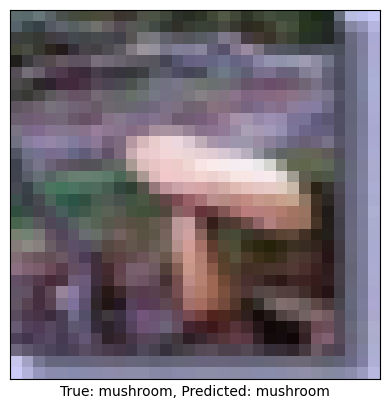

In [24]:
# Predict a single image from the test set
def predict_single_image(index):
    image = x_test[index]
    true_label = np.argmax(y_test[index])
    prediction = model.predict(image.reshape(1, 32, 32, 3))
    predicted_label = np.argmax(prediction)

    # Display the image with predictions
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    # Use CIFAR100_LABELS instead of the undefined class_names
    plt.xlabel(f"True: {CIFAR100_LABELS[true_label]}, Predicted: {CIFAR100_LABELS[predicted_label]}")
    plt.show()

# Example usage
predict_single_image(3)